In [50]:
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import (ols , wls)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [51]:
penguins = pd.read_csv("penguins_size.csv")

In [52]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Culmen
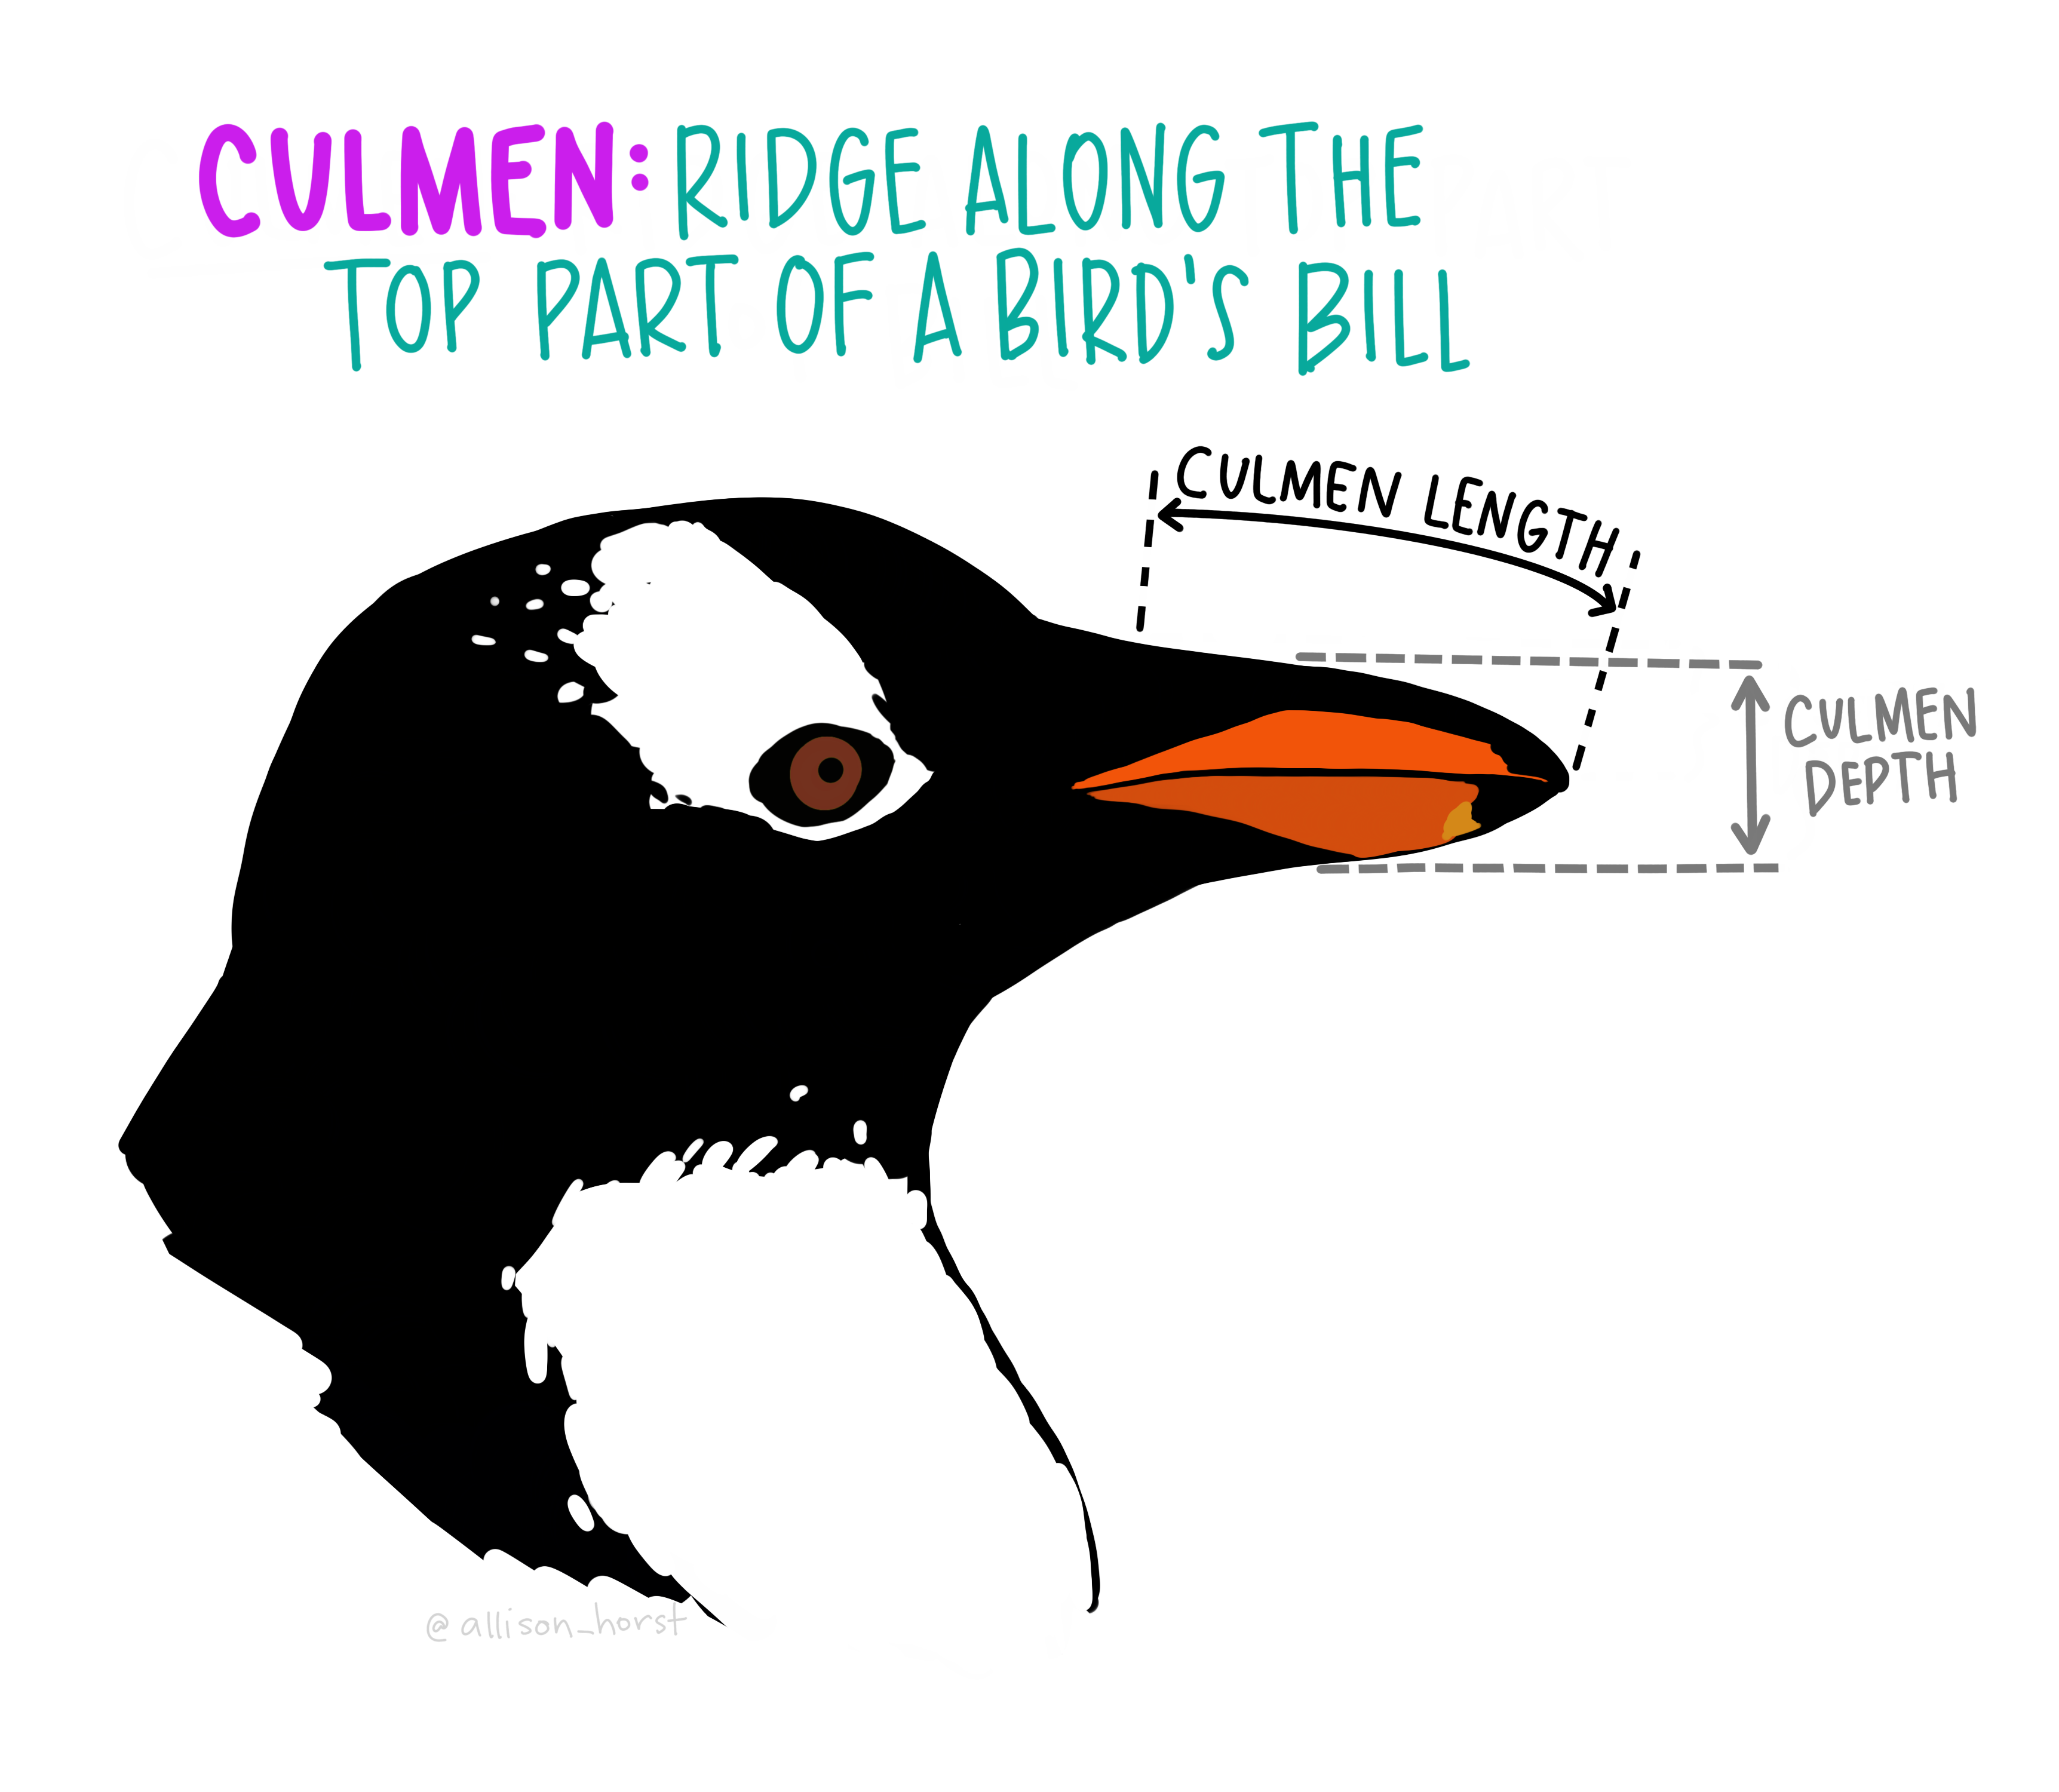
# Flipper
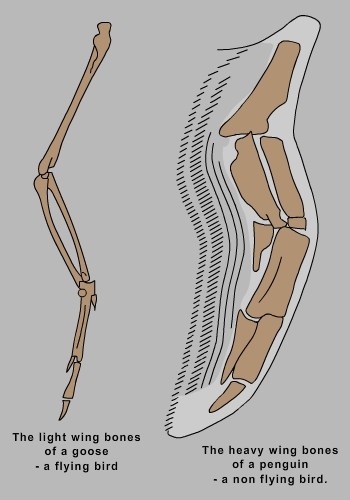

In [53]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [54]:
null_rows = penguins[penguins.isnull().any(axis=1)]
null_rows.head(30)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [55]:
#the first step is impute the values of sex column
penguins['sex'].fillna(penguins['sex'].mode()[0], inplace=True) 
#replace the "." with the mode of the column
penguins['sex'].replace(".", penguins['sex'].mode()[0], inplace=True)

In [56]:
null_rows = penguins[penguins.isnull().any(axis=1)]
null_rows.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,MALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,MALE


In [57]:
#in this case, we are going to drop the rows with null values because we cant impute the values of the columns because 
# it will be a bias in the data and the data that we have that's not null is not significant to impute the values of the columns
penguins.dropna(inplace=True)

In [58]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


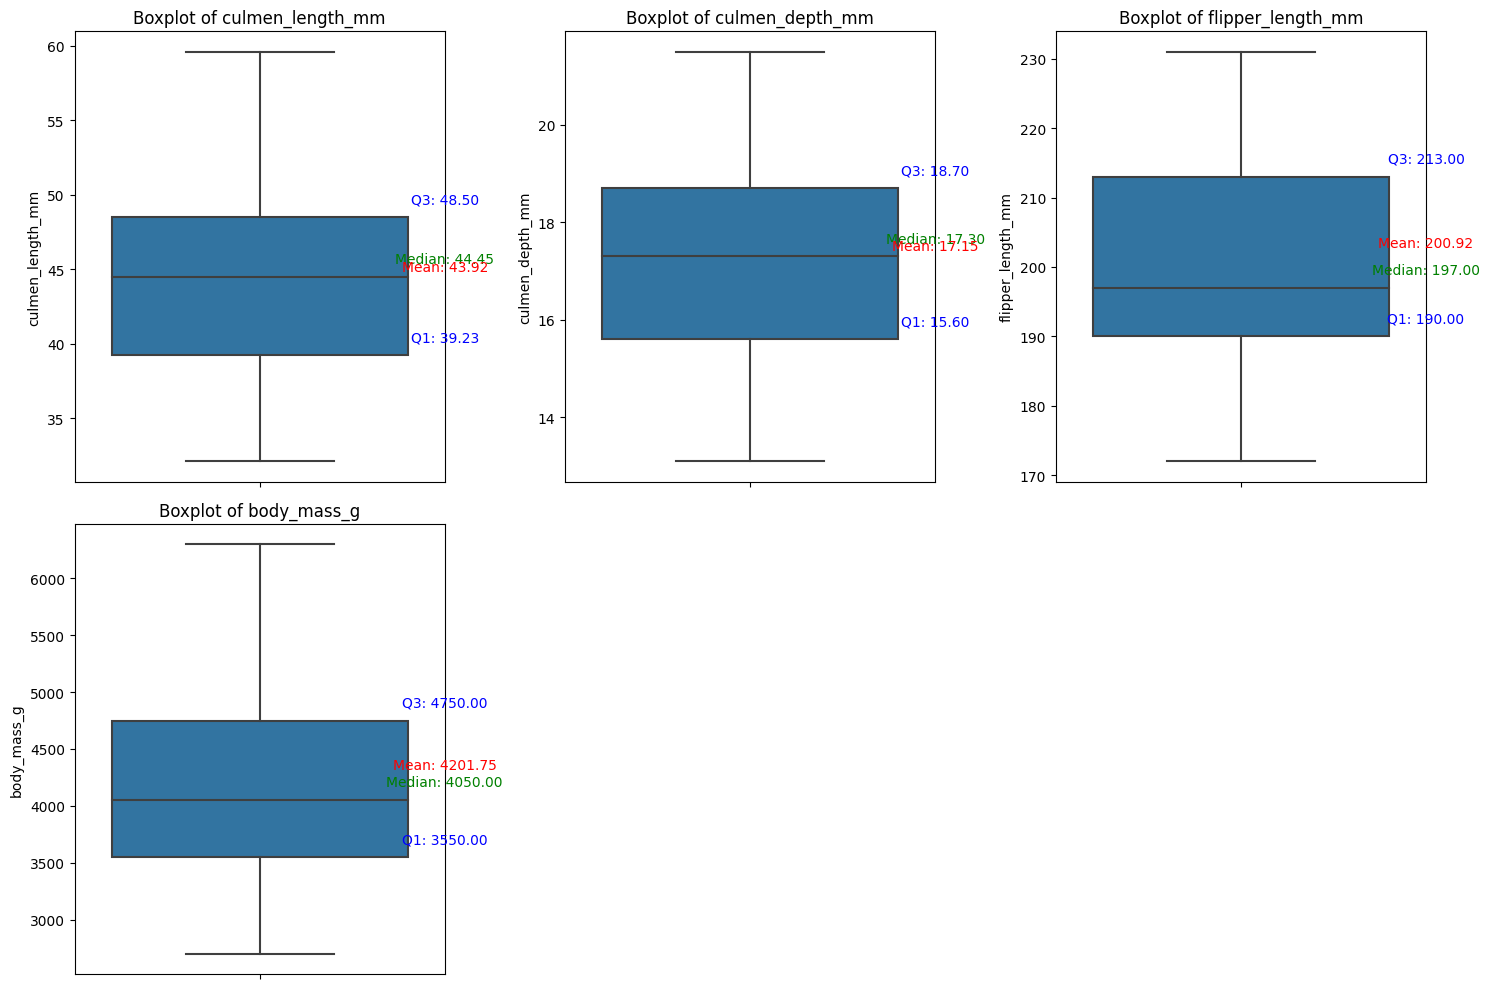

In [ ]:
# we have to see the distribution of the data and analyze the outliers or the data that is not normal distributed
# we are going to use the boxplot to see the distribution of the data
numeric_columns = penguins.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=penguins[column])
    plt.title(f'Boxplot of {column}')
    
    Q1 = penguins[column].quantile(0.25)
    Q2 = penguins[column].median()
    Q3 = penguins[column].quantile(0.75)
    mean = penguins[column].mean()
    
    plt.annotate(f'Q1: {Q1:.2f}', xy=(0.5, Q1), xytext=(0, 10), textcoords='offset points', ha='center', color='blue')
    plt.annotate(f'Median: {Q2:.2f}', xy=(0.5, Q2), xytext=(0, 10), textcoords='offset points', ha='center', color='green')
    plt.annotate(f'Q3: {Q3:.2f}', xy=(0.5, Q3), xytext=(0, 10), textcoords='offset points', ha='center', color='blue')
    plt.annotate(f'Mean: {mean:.2f}', xy=(0.5, mean), xytext=(0, 10), textcoords='offset points', ha='center', color='red')

plt.tight_layout()
plt.show()

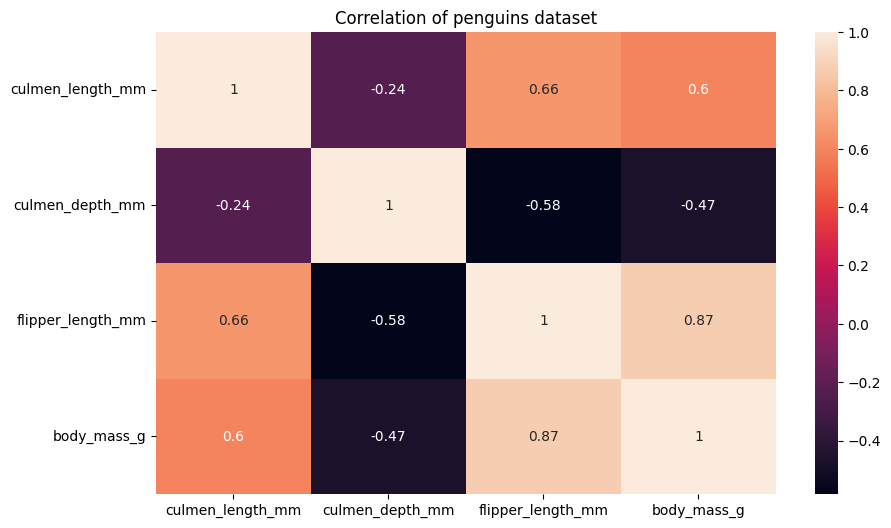

In [60]:
#now we are going to analyze the correlation between the columns with graphs
plt.figure(figsize=(10, 6))
sns.heatmap(penguins.corr(), annot=True)
plt.title('Correlation of penguins dataset')
plt.show()


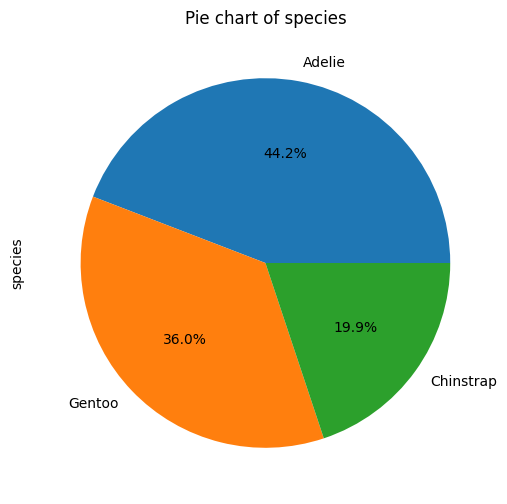

In [61]:
#now a pie chart of the species
plt.figure(figsize=(10, 6))
penguins['species'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie chart of species')
plt.show()

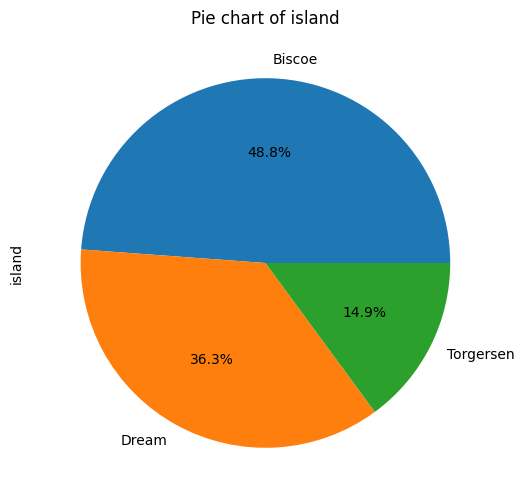

In [62]:
#now a pie chart of the island
plt.figure(figsize=(10, 6))
penguins['island'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie chart of island')
plt.show()

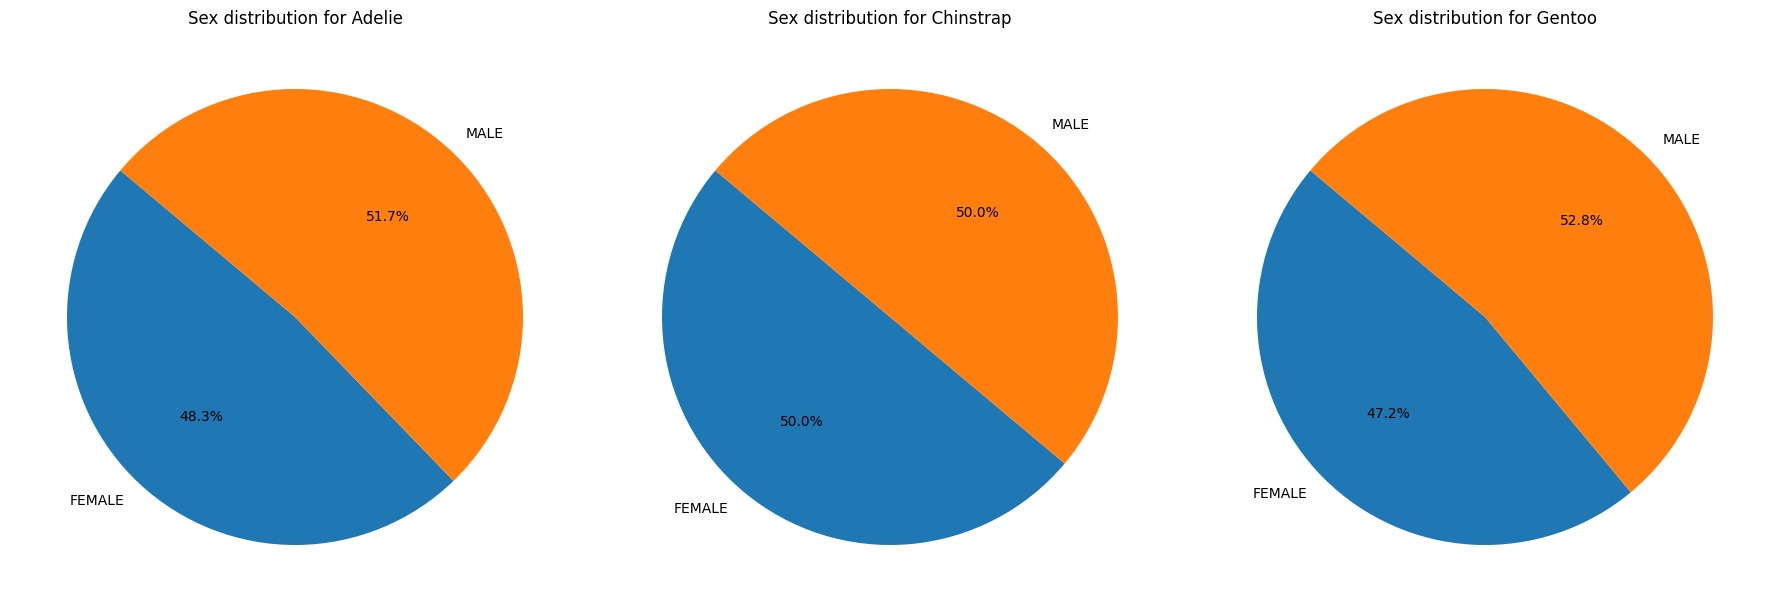

In [ ]:
# Now a pie chart of the sex per species
grouped_data = penguins.groupby(['species', 'sex']).size().unstack().fillna(0)

fig, axes = plt.subplots(1, len(grouped_data), figsize=(18, 6))

for i, species in enumerate(grouped_data.index):
    axes[i].pie(grouped_data.loc[species], labels=grouped_data.columns, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Sex distribution for {species}')

plt.tight_layout()
plt.show()

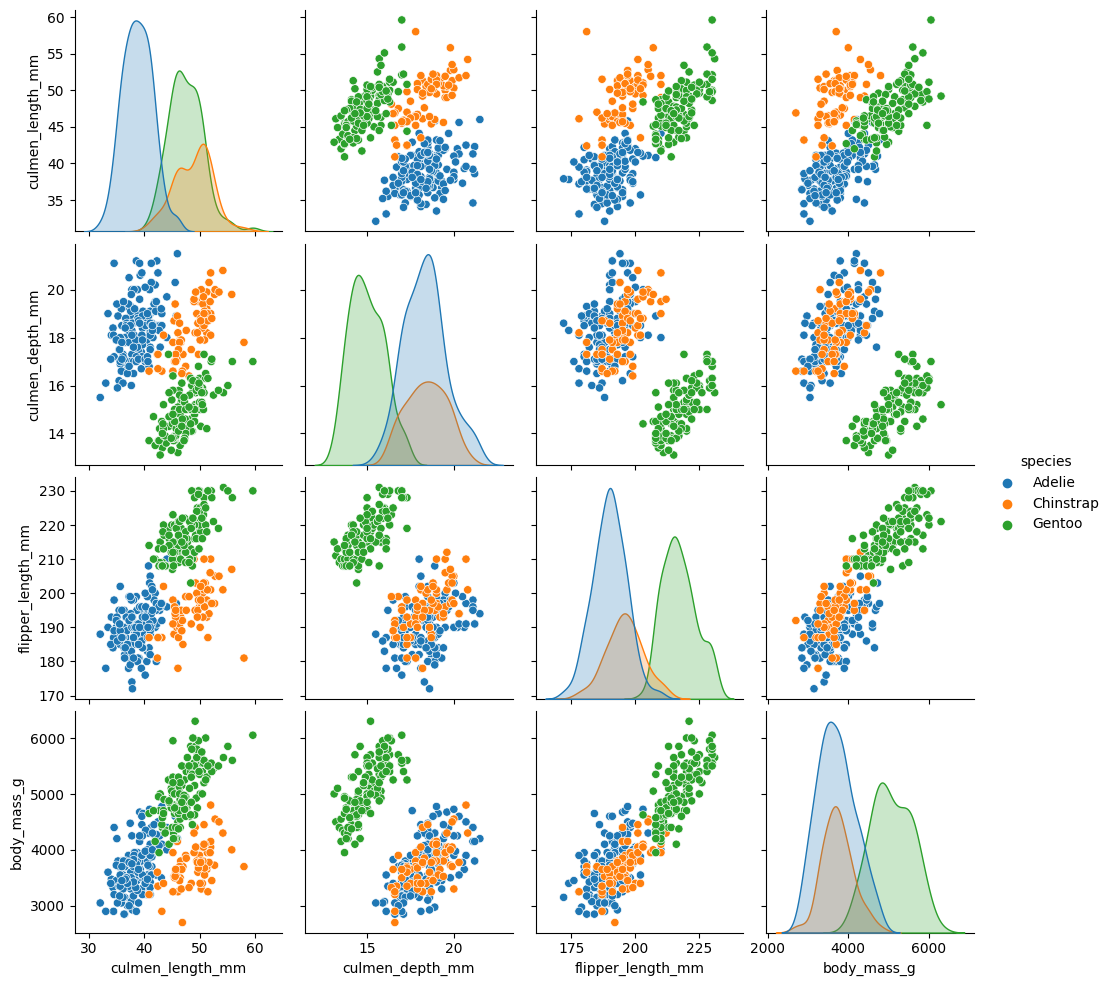

In [76]:
sns.pairplot(penguins, hue='species')
plt.show()

In [77]:
#now we're going to save the cleaned data
penguins.to_csv("penguins_cleaned.csv", index=False)